<a href="https://colab.research.google.com/github/moomonkey/tf_lab/blob/master/Fashion_mnist_3_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Denna kod använder Tensorflow, keras, med Fashion-mnist som databas

# Denna kod är baserad på dokumentation i Francois Chollets "Deep learning with Python", tensorflow API, docs, och tutorials: https://www.tensorflow.org/tutorials/keras/basic_classification och Keras dokumentation, https://keras.io/examples/mnist_cnn/. Visualisering är inkluderad för att verifiera koden.

# Imports

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importera dataset Fashion-mnist, vilket har 10 kategorier, i träningsdata, träningslabel för att träna modellen, testdata och testlabels för att testa modellen

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_img, train_labels), (test_img, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Se träningsdata och testdata

In [9]:
print("Träningsbilder: ", train_img.shape, "Träningsetiketter: ", train_labels.shape) #består av 60000 exempel i 28*28 pixelformat
#Se test data
print("Testbilder: ", test_img.shape, "Testetiketter: ", test_labels.shape) #består av 10000 exempel i 28*28 format
#Skapa etiketter
fashion_cat = ['T-shirt', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Boot']

Träningsbilder:  (60000, 28, 28) Träningsetiketter:  (60000,)
Testbilder:  (10000, 28, 28) Testetiketter:  (10000,)


#Förbered datan och normalisera. Encode etiketter

In [10]:
import pandas as pd
train_img = train_img.reshape(-1,28,28,1)
print(train_img.shape)
test_img = test_img.reshape(-1,28,28,1)
print(test_img.shape)
#Ändra typ till fl32
train_img = train_img.astype('float32') / 255 #Normalisera pixeldimension från 0-255 till 0-1
test_img = test_img.astype('float32') / 255
#Encode etiketter
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels.shape) #se output
print(test_labels.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [12]:
model = tf.keras.Sequential()
#Lager ett med Conv2D (32 channels, 3X3 filter), Maxpooling. Använder padding och Dropout(0.3)
model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))#storlek på poolingfönster
model.add(tf.keras.layers.Dropout(0.3))
#lager två med Conv2D (64 channels, 3X3 filter), Maxpooling. Använder padding och Dropout (0.3)
model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
#lager tre med Conv2D (64 channels, 3X3 filter), Maxpooling. Använder padding och Dropout (0.3)
model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
#lager fyra med Conv2D (64 channels, 3X3 filter), Maxpooling. Använder padding och Dropout (0.3)
model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
#Flatten och classification
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.3)) # lade till dropout för att regulera overfit
model.add(tf.keras.layers.Dense(100)) #Dense är 100 neurons "fully connected"
model.add(tf.keras.layers.Dense(10, activation= 'softmax'))#probabilty score (10 neurons) till kategorierna

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)         

# Kompilera modellen

In [0]:

model.compile(optimizer='adam',#stochastic gradient decent, fungerade bättre än 'rmsprop'
              loss='categorical_crossentropy', #loss funktion categorical (inte sparse_categorical_crossentropy labels får inte plats)
              metrics=['accuracy'])

# Training model med 20 epoch

In [16]:
history = model.fit(train_img, train_labels, epochs=20) #20 epochs

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 99s 2ms/sample - loss: 0.7421 - acc: 0.7223
Epoch 2/20
60000/60000 [==============================] - 99s 2ms/sample - loss: 0.5006 - acc: 0.8187
Epoch 3/20
60000/60000 [==============================] - 99s 2ms/sample - loss: 0.4461 - acc: 0.8393
Epoch 4/20
60000/60000 [==============================] - 98s 2ms/sample - loss: 0.4162 - acc: 0.8499
Epoch 5/20
60000/60000 [==============================] - 98s 2ms/sample - loss: 0.3953 - acc: 0.8587
Epoch 6/20
60000/60000 [==============================] - 99s 2ms/sample - loss: 0.3790 - acc: 0.8632
Epoch 7/20
60000/60000 [==============================] - 99s 2ms/sample - loss: 0.3728 - acc: 0.8676
Epoch 8/20
60000/60000 [==============================] - 99s 2ms/sample - loss: 0.3662 - acc: 0.8693
Epoch 9/20
60000/60000 [==============================] - 99s 2ms/sample - loss: 0.3536 - acc: 0.8730
Epoch 10/20
60000/60000 [==============================] - 

# Använd test data på modellen för att jämföra med träningsdata

#Plot accuracy och loss av träningsdatan

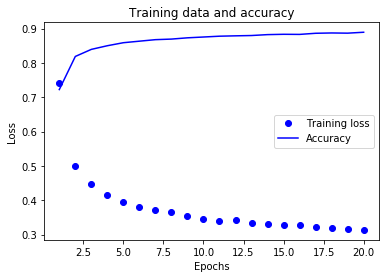

In [17]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, acc_values, 'b', label='Accuracy')
plt.title('Training data and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
history2 = model.fit(test_img, test_labels, epochs=20) 

Train on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 16s 2ms/sample - loss: 0.3505 - acc: 0.8745
Epoch 2/20
10000/10000 [==============================] - 16s 2ms/sample - loss: 0.3544 - acc: 0.8770
Epoch 3/20
10000/10000 [==============================] - 16s 2ms/sample - loss: 0.3395 - acc: 0.8815
Epoch 4/20
10000/10000 [==============================] - 16s 2ms/sample - loss: 0.3318 - acc: 0.8846
Epoch 5/20
10000/10000 [==============================] - 16s 2ms/sample - loss: 0.3345 - acc: 0.8843
Epoch 6/20
10000/10000 [==============================] - 17s 2ms/sample - loss: 0.3326 - acc: 0.8788
Epoch 7/20
10000/10000 [==============================] - 16s 2ms/sample - loss: 0.3140 - acc: 0.8873
Epoch 8/20
10000/10000 [==============================] - 16s 2ms/sample - loss: 0.3163 - acc: 0.8858
Epoch 9/20
10000/10000 [==============================] - 16s 2ms/sample - loss: 0.3130 - acc: 0.8883
Epoch 10/20
10000/10000 [==============================] - 

#Plot accuaracy och loss av testdatan

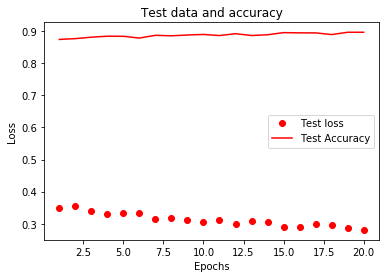

In [19]:
import matplotlib.pyplot as plt

history_dict = history2.history
test_loss_values = history_dict['loss']
test_acc_values = history_dict['acc']
epochs = range(1, len(test_acc_values) + 1)
plt.plot(epochs, test_loss_values, 'ro', label='Test loss')
plt.plot(epochs, test_acc_values, 'r', label='Test Accuracy')
plt.title('Test data and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Evaluera och jämför training data med test data

In [20]:
train_loss, train_acc = model.evaluate(train_img, train_labels)
test_loss, test_acc = model.evaluate(test_img, test_labels)
print('\nTrain noggrannhet: ', round(train_acc*100, 2),'%')
print('\nTest noggrannhet: ', round(test_acc*100, 2),'%')

print('\nTrain loss: ', round(train_loss, 2),'%')
print('\nTest loss: ', round(test_loss, 2),'%')


10000/10000 [==============================] - 4s 436us/sample - loss: 0.1584 - acc: 0.9394

Train noggrannhet:  92.01 %

Test noggrannhet:  93.94 %

Train loss:  0.21 %

Test loss:  0.16 %
